# Logistic Regression Implementation

## Insurance Case Study

##### 30-MAY-2019

In [4]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#claimants1.to_csv("claim.csv")

In [6]:
pwd

'C:\\Users\\admin'

In [3]:
# data visualization
%matplotlib inline                  #output of plotting commands is displayed inline within frontends

In [4]:
import os     #part of the standard library
os.chdir("C:\\Users\\Admin\\Desktop")  #changing directry from "admin" to "desktop"

In [5]:
pwd

'C:\\Users\\Admin\\Desktop'

In [6]:
#Importing Data
claimants1 = pd.read_csv("C:\\Users\\Admin\\Desktop\\SARLAKG\\Jupyter Files Commented\\3 Logistic\\claimants.csv")

In [7]:
# view last 5 records in dataset
claimants1.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


In [8]:
claimants1.shape  #Give you dimension of the dataset

(1340, 7)

In [9]:
claimants1.head() #top 5 records

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [10]:
# removing CASENUM
#claimants1.drop(["CASENUM"],axis=1) 
claimants3 = claimants1.drop(["CASENUM"],axis=1,inplace=False)


In [12]:
claimants1.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [13]:
claimants1.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [13]:
claimants2 = claimants1.drop(claimants1.index[[2]],axis=0)   # to remove 2nd record completely
claimants2.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309


In [15]:
claimants1.describe() #same as "summary" in R
#claimants1.shape

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [15]:
# usage lambda and apply function
# apply function => we use to apply custom function operation on 
# each column
# lambda just an another syntax to apply a function on each value 
# without using for loop 
claimants1.isnull().sum()  # display number of nulls, NA (or blank) values in each column

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [16]:
## mean value for all columns using lambda
claimants1.apply(lambda x:x.median()) ###type(claimants1)
claimants1.median()    

CASENUM     8756.5000
ATTORNEY       0.0000
CLMSEX         1.0000
CLMINSUR       1.0000
SEATBELT       0.0000
CLMAGE        30.0000
LOSS           1.0695
dtype: float64

In [17]:
# mean value for all(/for CASENUM column ) columns
claimants1.CASENUM.mean()

11202.001492537314

In [19]:
#Imputating the missing values with most repeated values in that column

In [20]:
# lambda x:x.fillna(x.value_counts().index[0]) 
# the above line gives you the most repeated value in each column
claimants1.CLMAGE.mode()
claimants1.CLMAGE.value_counts().index[0]

10.0

In [21]:
claimants1.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [21]:
# filling the missing value with most occuring value    
claimants1.iloc[:,2:6] = claimants1.iloc[:,2:6].apply(lambda x:x.fillna(x.median()))
#claimants3.SEATBELT = claimants1.SEATBELT.fillna(claimants1.SEATBELT.mean())
claimants1.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# claimants.SEATBELT.value_counts()

In [22]:
# select only first 5 columns
#claimants.iloc[:,:].columns
claimants1.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

# Implementing Logistic Regression

In [23]:
# Model building
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
logit_model = smf.logit('ATTORNEY ~ CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = claimants1).fit()

Optimization terminated successfully.
         Current function value: 0.609031
         Iterations 7


In [24]:
type(logit_model)
#logit_model.params
#claimants.shape

statsmodels.discrete.discrete_model.BinaryResultsWrapper

In [25]:
# summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 May 2019   Pseudo R-squ.:                  0.1210
Time:                        21:43:01   Log-Likelihood:                -816.10
converged:                       True   LL-Null:                       -928.48
                                        LLR p-value:                 1.421e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1552      0.226     -0.686      0.493      -0.599       0.288
CLMAGE         0.0068      0.003      2.121      0.034       0.001       0.013
LOSS          -0.3229      0.029    -10.966      0.000      -0.381      -0.265
CLMINSUR       0.5271      0.210      2.510      0.012       0.115       0.939
CLMSEX         0.3209      0.120      2.677      0.007       0.086       0.556
SEATBELT      -0.6701      0.522     -1.283      0.200      -1.694       0.354
==============================================================================
"""

In [27]:
# prediction using logit_model
pv = logit_model.predict(claimants1)
#pv

In [28]:
# Creating new column for storing predicted class of Attorney
claimants1["pred_prob"] = pv
claimants1.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob
0,5,0,0.0,1.0,0.0,50.0,34.940,0.000026
1,3,1,1.0,0.0,0.0,18.0,0.891,0.499916
2,66,1,0.0,1.0,0.0,5.0,0.330,0.574242
3,70,0,0.0,1.0,1.0,31.0,0.037,0.474894
4,96,1,0.0,1.0,0.0,30.0,0.038,0.637042


In [29]:
# filling all the cells with zeroes
claimants1["Pred.Value"] = 0
claimants1.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob,Pred.Value
0,5,0,0.0,1.0,0.0,50.0,34.940,0.000026,0
1,3,1,1.0,0.0,0.0,18.0,0.891,0.499916,0
2,66,1,0.0,1.0,0.0,5.0,0.330,0.574242,0
3,70,0,0.0,1.0,1.0,31.0,0.037,0.474894,0
4,96,1,0.0,1.0,0.0,30.0,0.038,0.637042,0


In [30]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
claimants1.loc[claimants1.pred_prob >= 0.5,"Pred.Value"] = 1
claimants1.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob,Pred.Value
0,5,0,0.0,1.0,0.0,50.0,34.940,0.000026,0
1,3,1,1.0,0.0,0.0,18.0,0.891,0.505625,1
2,66,1,0.0,1.0,0.0,5.0,0.330,0.593992,1
3,70,0,0.0,1.0,1.0,31.0,0.037,0.469851,0
4,96,1,0.0,1.0,0.0,30.0,0.038,0.638205,1


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
# confusion matrix 
#confusion_matrix = pd.crosstab(claimants1['ATTORNEY'],claimants1['Pred.Value'])
#confusion_matrix


cm =confusion_matrix(claimants1.ATTORNEY,claimants1['Pred.Value'])
cm

array([[685,   0],
       [655,   0]], dtype=int64)

In [36]:

accuracy_score(claimants1.ATTORNEY , claimants1['Pred.Value'])
685/1340
#confusion_matrix(claimants1.ATTORNEY , claimants1['Pred.Value'])

0.5111940298507462

In [38]:
# accuracy
acc = (435+506)/(435+506+149+250)
acc
np.mean(claimants1.ATTORNEY == claimants1['Pred.Value'])

0.7022388059701492

In [59]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(claimants1.ATTORNEY, y_pred1)

0.75927898813172123

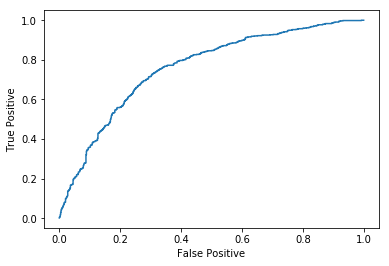

In [60]:
# the above function is applicable for binary classification class 

plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc

In [44]:
### Dividing data into train and test data sets
claimants.drop("Att_val",axis=1,inplace=True)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# splitting training set and test set
train, test = train_test_split(claimants,test_size=0.3)

In [48]:
# checking na values 
train.isnull().sum()
test.isnull().sum()

ATTORNEY     0
CLMSEX       0
CLMINSUR     0
SEATBELT     0
CLMAGE       0
LOSS         0
pred_prob    0
dtype: int64

In [49]:
# Building a model on train data set 

train_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = train).fit()

Optimization terminated successfully.
         Current function value: 0.587017
         Iterations 8


In [51]:
# summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Jul 2018   Pseudo R-squ.:                  0.1527
Time:                        16:46:31   Log-Likelihood:                -550.62
converged:                       True   LL-Null:                       -649.86
                                        LLR p-value:                 5.987e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4544      0.271      1.676      0.094      -0.077       0.986
CLMAGE         0.0068      0.004      1.768      0.077      -0.001       0.014
LOSS          -0.4257      0.040    -10.653      0.000      -0.504      -0.347
CLMINSUR       0.1196      0.246      0.486      0.627      -0.362       0.601
CLMSEX         0.1831      0.147      1.247      0.212      -0.105       0.471
SEATBELT      -0.4081      0.553     -0.739      0.460      -1.491       0.675
==============================================================================
"""

In [52]:
# prediction using the model
train_pred = train_model.predict(train.iloc[:,1:])

In [53]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
train["train_pred"] = np.zeros(938)

In [54]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1

In [57]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['ATTORNEY'],train.train_pred)
confusion_matrix

train_pred,0.0,1.0
ATTORNEY,,
0,291,190
1,84,373


In [58]:
# accuracy
accuracy_train = (436+504)/(1340) # 70.14
accuracy_train

0.7014925373134329

In [59]:
# Prediction on Test data set

test_pred = train_model.predict(test)

In [60]:
# Creating new column for storing predicted class of Attorney

In [61]:
# filling all the cells with zeroes
test["test_pred"] = np.zeros(402)

In [62]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

In [63]:
# confusion matrix 
confusion_matrix = pd.crosstab(test['ATTORNEY'],test.test_pred)
confusion_matrix

test_pred,0.0,1.0
ATTORNEY,,
0,123,81
1,47,151


In [64]:
# accuracy
accuracy_test = (126+161)/(402) # 71.39
accuracy_test

0.7139303482587065